## Rozwiązywanie równań różniczkowych metodami algebry liniowej 

#### Zadanie 1
Zaimplementuj metodą iteracyjną rozwiązywania układów równań Czebyszewa. 





In [0]:
import numpy as np
from scipy.linalg import norm

def chebyshev(A, b, max_iterations, l_max, l_min, eps, n=10):
    d = (l_max + l_min) / 2
    c = (l_max - l_min) / 2
    x = np.zeros(pow(n, 2))
    r = np.matmul(A, x)
    r = b - r
    iterations = 0

    for i in range(1, max_iterations):
        iterations += 1
        z = np.linalg.solve(A, r)
        alpha = 1
        if i == 1:
            p = z
            alpha = 1 / d
        elif i == 2:
            beta = (1 / 2) * (c * alpha) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        else:
            beta = (c * alpha / 2) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        x = x + alpha * p
        r = np.matmul(A, x)
        r = b - r
        if norm(r) < eps:
            return x, iterations
    return x, iterations

#### Zadanie 2
Zapoznaj się z prezentacją dr Rycerz o sposobie rozwiązywaniu równania różniczkowego Poissona dla dwóch wymiarów (metoda różnic skończonych).

Rozwiąż równanie Poissona w przestrzeni 2D. Funkcja rozkładu źródeł ma postać: $$\rho(x,y) = \frac{x+y}{2}$$    
Obliczenia dokonujemy w obszarze dwuwymiarowym: $$\Omega = [0,10] \times [0,10]$$ Siatkę proszę dobrać samodzielnie tak by obliczenie nie było zbyt długie (na podstawie wcześniejszy testów metod iteracyjnych).   
Warunki brzegowe jednorodne Dirichleta: 0 na brzegach. 

Przedstaw sposób konstrukcji układu równań w metodzie różnic skończonych dla tego równiania. Przedstaw rozwiązanie graficznie. 



Równanie Poissona ma postać: $\nabla^{2}*\varphi(x,y) = - 	\rho(x,y)$ ,

gdzie $\rho(x,y) = \frac{x+y}{2}$ - jest funkcją rozkładu żródeł, a $\nabla^{2}$ operatorem Laplace'a

powyższe równanie można zapisać w taki sposób: $\frac{\partial^{2}*\varphi(x,y)}{\partial*x^{2}}$ + $\frac{\partial^{2}*\varphi(x,y)}{\partial*y^{2}} = -\rho(x,y)$

zakładamy jednorodne warunki brzegowe Dirichleta: 0 na brzegach: $\varphi(0,y) = 0, \varphi(n+1,y) = 0, \varphi(x,0) = 0,\varphi(x,n+1) = 0$

następnie za pomocą metody różnic skończonych (MES) przybliżamy pochodne różnicami skończonymi:

rozpoczynamy od wyprowadzenia siatki: 

$\varphi_{i, j} = \varphi(x_{i}, y_{j}), i = 1,...N, j = 1,...M,$ gdzie $N$ i $M$ $=$ $10$, 

$ (x_{i}, y_{j})$ - punkty siatki,

następnie stosujemy warunki brzegowe i uwzględniamy h - odstęp między punktami na siatce (w naszym przypadku 1)

obliczamy pochodne po $x$ i po $y$:
$\frac{\partial\varphi_{i,j}}{\partial x} = \frac{\varphi_{i+1,j}-\varphi_{i-1,j}}{2h} + O(h^{2})$

$\frac{\partial^{2}\varphi_{i,j}}{\partial x^{2}} = \frac{\varphi_{i+1,j}-2 \varphi_{i,j}+\varphi_{i-1,j}}{h^{2}} + O(h^{2})$

$\frac{\partial \varphi_{i,j}}{\partial y} = \frac{\varphi_{i,j+1}-\varphi_{i,j-1}}{2h} + O(h^{2})$

$\frac{\partial^{2} \varphi_{i,j}}{\partial y^{2}} = \frac{\varphi_{i,j+1}-2 \varphi_{i,j}+\varphi_{i,j-1}}{h^{2}} + O(h^{2})$

ostatecznie łączymy równania i po skróceniu otrzymujemy: 

$\frac{\varphi(x_{i}, y_{j-1}) + 
\varphi(x_{i-1}, y_{j}) - 
4\varphi(x_{i}, y_{j}) +
\varphi(x_{i+1}, y_{j}) +
\varphi(x_{i}, y_{j+1})}{h^{2}} = -\rho(x,y)$ $(*)$

Dla każdego z punktów $(x_{i}, y_{j})$ na skonstruowanej przez nas siatce, równanie $(*)$ będzie zależało od 4 punktów oddalonych o h od niego.



In [66]:
def lecture_matrix_A(n=10):
    A = np.zeros((n ** 2, n ** 2))
    for i in range(n ** 2):
        A[i][i] = -4
        if i - 1 >= 0:
            A[i-1][i] = 1.0
        if i + 1 < n ** 2:
            A[i+1][i] = 1.0
        if i - n >= 0:
            A[i-n][i] = 1.0
        if i + n < n ** 2:
            A[i+n][i] = 1.0
    return A

def lecture_vector_b(n=10):
    phi = lambda x, y: (x + y)/2
    b = np.zeros(n**2)
    idx = 0
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            b[idx] = phi(j, i)
            idx += 1
    return b

def print_matrix(A, n=10):
    for i in range(n):
        for j in range(n):
            print(A[i][j], " ", end='')
        print("")

def print_vector(b):
  print(b)

A = create_matrix_A()
b = create_vector_b()

print("matrix A (20x20 fragment):")
print_matrix(A, 20)
print('\n')
print("vector b:")
print_vector(b)

matrix A (20x20 fragment):
-4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  -4.0  1.0 

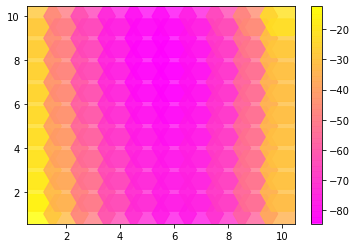

In [63]:
import matplotlib.pyplot as plt
import matplotlib

def show_plot(n=10):
  chebyshev_result, chebyshev_iterations = chebyshev(A, b, 1000, 0, 2, 1e-8)
  cmap = matplotlib.cm.spring

  x, y = [], []
  for i in range(1, n+1):
      for j in range(1, n+1):
          x.append(i)
          y.append(j)

  plt.scatter(x, y, c=chebyshev_result, sizes=[2000 for i in range(pow(n,2))], alpha=0.8, cmap=cmap, marker='H')
  plt.colorbar()
  plt.show()

show_plot()

#### Zadanie 3
Zastosuj do otrzymanego układu równań metody Gaussa-Seidla, SOR i Czebyszewa. Porównaj zbieżność tych metod. 

In [0]:
def gauss_seidl(A, b, max_iterations):
    iterations = 0
    x = np.zeros(len(b))
    for i in range(max_iterations):
        iterations += 1
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, rtol=1e-8):
            break
        x = x_new
    return x, iterations

def sor(A, b, max_iterations, omega):
    iterations = 0
    epsilon = 1e-8
    x = np.zeros_like(b)
    if omega < 0 or omega > 2:
        print('omega < 0 or omega > 2')
        return [x, -1]
    n = b.shape
    x_new = np.zeros_like(x)
    for _ in range(max_iterations):
        iterations += 1
        for i in range(n[0]):
            new_values_sum = np.dot(A[i, :i], x[:i])
            old_values_sum = np.dot(A[i, i + 1:], x_new[i + 1:])
            x[i] = (b[i] - (old_values_sum + new_values_sum)) / A[i, i]
            x[i] = np.dot(x[i], omega) + np.dot(x_new[i], (1 - omega))
        if np.linalg.norm(np.dot(A, x) - b) < epsilon:
            break
        x_new = x
    return x, iterations

In [65]:
def compare(A, b, max_iterations, l_max, l_min, epsilon, omega):
  chebyshev_result, chebyshev_iterations = chebyshev(A, b, max_iterations, l_max, l_min, epsilon)
  gauss_seidl_result, gauss_seidl_iterations = gauss_seidl(A, b, max_iterations)
  sor_result, sor_iterations = sor(A, b, max_iterations, omega)

  print(f"Chebyshev result: \n {chebyshev_result}, \n")
  print(f"Gaus-Seidl result: \n {gauss_seidl_result}, \n")
  print(f"SOR result: \n {sor_result}, \n")

  print(f"Chebyshev iterations: {chebyshev_iterations}")
  print(f"Gaus-Seidl iterations: {gauss_seidl_iterations}")
  print(f"SOR iterations: {sor_iterations}")

compare(A, b, 1000, 0, 2, 1e-8, 1.4)

Chebyshev result: 
 [-12.38060444 -16.96024437 -19.29167572 -20.93570123 -22.34404399
 -23.634568   -24.82158505 -25.9051561  -26.95653179 -28.34429975
 -31.5621734  -34.66869733 -37.27075727 -39.60708523 -41.80590671
 -43.87264298 -45.74661611 -47.34250757 -48.57667129 -49.35849381
 -49.35509209 -50.88161427 -53.01557078 -55.41597573 -57.89985464
 -60.30348108 -62.44972884 -64.14158678 -65.14915201 -65.15791209
 -63.61808687 -63.98709688 -65.49393587 -67.64139225 -70.07405506
 -72.49169784 -74.6072314  -76.12495869 -76.72043787 -76.00591569
 -73.47224643 -72.9547505  -73.83168357 -75.58160233 -77.76327552
 -79.98202382 -81.86254023 -83.03057872 -83.10172509 -81.67306636
 -78.31023266 -77.02797512 -77.29644558 -78.59005797 -80.41542088
 -82.31058168 -83.83032698 -84.53309088 -83.98281742 -81.77439199
 -77.56764274 -75.55047172 -75.23606567 -76.0667631  -77.49776834
 -79.01455505 -80.11509514 -80.28864039 -79.02206171 -75.87404143
 -70.63547459 -67.87020335 -67.03058229 -67.44316043 -68